# Problem statement, Term Deposit Sale

## Goal:
Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

### Attribute information, Input variables:
#### Bank client data:

1. age: Continuous feature
2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
3. marital: marital status (married, single, divorced)
4. education: education level (primary, secondary, tertiary)
5. default: has credit in default?
6. housing: has housing loan?
7. loan: has personal loan?
8. balance in account
#### Related to previous contact:
9. contact: contact communication type
10. month: last contact month of year
11. day: last contact day of the month
12. duration: last contact duration, in seconds*
#### Other attributes:
13. campaign: number of contacts performed during this campaign and for this client
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days)
15. previous: number of contacts performed before this campaign and for this client
16. poutcome: outcome of the previous marketing campaign
#### Output variable (desired target):
17. Target: Tell us has the client subscribed a term deposit. (Yes, No)


In [1]:
import numpy as np
import pandas as pd

import seaborn as sns # Import data visualization library for statistical graphics
import matplotlib.pyplot as plt # Import data visualization library
%matplotlib inline

from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score

# from sklearn.preprocessing import PolynomialFeatures
# from sklearn import linear_model

# ---------------------------------------------------------------------------------------------------------------
#from sklearn import linear_model

#import matplotlib as mpl
#import statsmodels.api as sm
#from sklearn import datasets


#from sklearn import metrics
# ---------------------------------------------------------------------------------------------------------------
from sklearn import metrics

from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
#from IPython.display import Image  
#import pydotplus as pydot
#from os import system

In [2]:
dfBankData = pd.read_csv("bank-full.csv")

In [3]:
dfBankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Deliverable – 1 (Exploratory data quality report reflecting the following) – (20)

### 1. Univariate analysis (12 marks)

a. Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.

b. Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment.

c. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots.

In [4]:
dfBankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
for col in dfBankData:
    print(col," = ",dfBankData[col].unique())

age  =  [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job  =  ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital  =  ['married' 'single' 'divorced']
education  =  ['tertiary' 'secondary' 'unknown' 'primary']
default  =  ['no' 'yes']
balance  =  [ 2143    29     2 ...  8205 14204 16353]
housing  =  ['yes' 'no']
loan  =  ['no' 'yes']
contact  =  ['unknown' 'cellular' 'telephone']
day  =  [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month  =  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration  =  [ 261  151   76 ... 1298 1246 1556]
campaign  =  [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21

In [6]:
dfBankData.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [7]:
dfBankData.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

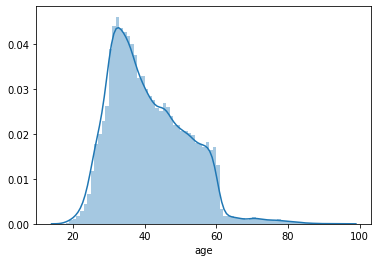

In [8]:
sns.distplot(dfBankData['age'], bins=77, kde=True);

<h3 style="color:red;">The Mode of the age is around 30 years, therefore most data will be grouped in customers that have this age.</h3>

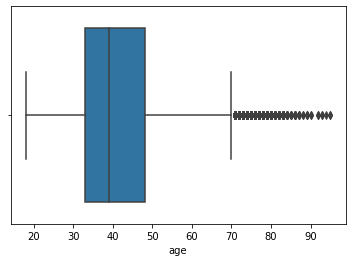

In [9]:
sns.boxplot(x=dfBankData["age"]);   # box plot

<h3 style="color:red;">Confirming the information given by the distribution plot, the mean of the age is aroung 38 years, and 50% of the customers have between 33 and 47 years. A group of outliers between 60 and 90 something years of age is identified, thoug no action will be taken as the information is considered to be significant to be kept.</h3>

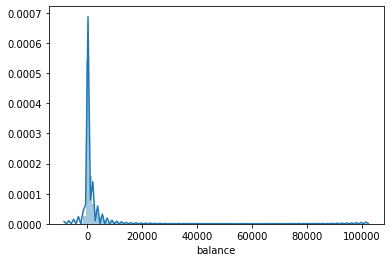

In [10]:
sns.distplot(dfBankData["balance"], bins=100, kde=True);

<h3 style="color:red;">A distribution plot indicates that the balance, being considered here as "savings" as no further information is given, is in fact very low. In other words customers have very little savings.</h3>

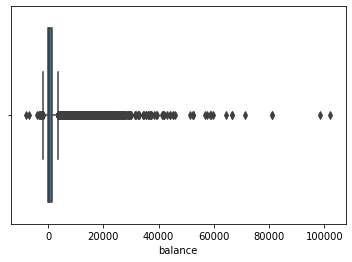

In [11]:
sns.boxplot(x=dfBankData["balance"]);   # box plot

<h3 style="color:red;">The box plot here, related to the balance confirms what has been said from the distribution plot of the balance information, again the outliers are considered to offer significant information and are kept as they are.</h3>

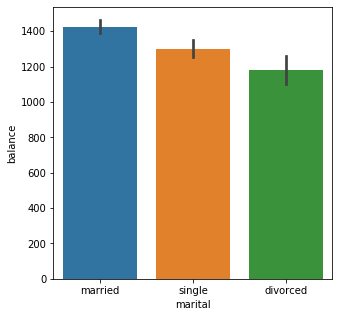

In [12]:
plt.figure(figsize=(5,5))
sns.barplot(data=dfBankData,x="marital",y="balance")
plt.show()

<h3 style="color:red;">The bar plot above indicates that the balance of those married is the highest followed by those who are single and ending at the lowest end with those who are divorced.</h3>

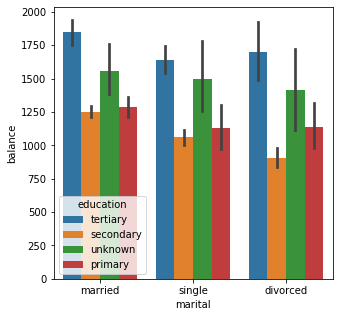

In [13]:
plt.figure(figsize=(5,5))
sns.barplot(data=dfBankData,x="marital",y="balance", hue=dfBankData["education"])
plt.show()

<h3 style="color:red;">Same as the figure above, but discriminating by the kind of education.</h3>

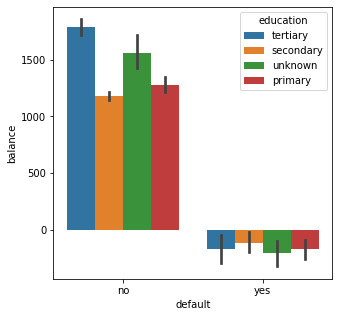

In [14]:
plt.figure(figsize=(5,5))
sns.barplot(data=dfBankData,x="default",y="balance", hue=dfBankData["education"])
plt.show()

<h3 style="color:red;">Comparing The balance by those found in loan default (having therefore negative balance). It can be seen that those with tertiary education have the highest savings as compared to those with secondary and primary. Something important to notice is that for those with the highest levels of default, debt, their level of education is unknown. By adding a hue with the education factor it can be appreciated how it influences both, savings and default status.</h3>

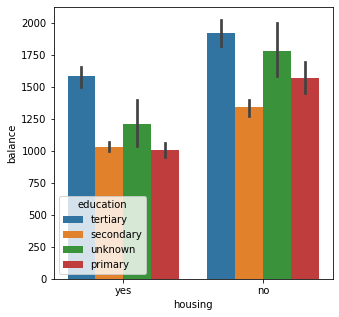

In [15]:
plt.figure(figsize=(5,5))
sns.barplot(data=dfBankData,x="housing",y="balance", hue=dfBankData["education"])
plt.show()

<h3 style="color:red;">In the barplot figure above it can be appreciated a clear correlation between education and housing (mortgage) loans, as well as the oportunity levels for those who haven't requested such a benefit.</h3>

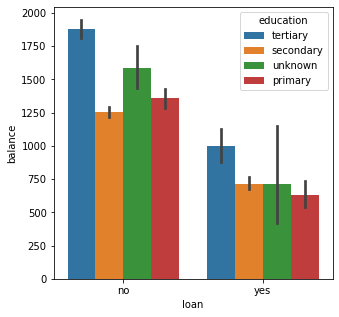

In [16]:
plt.figure(figsize=(5,5))
sns.barplot(data=dfBankData,x="loan",y="balance", hue=dfBankData["education"])
plt.show()

<h3 style="color:red;">Similar to the barplot figure related to housing loans, direct loans (or money loans) have a similar behaviour.</h3>

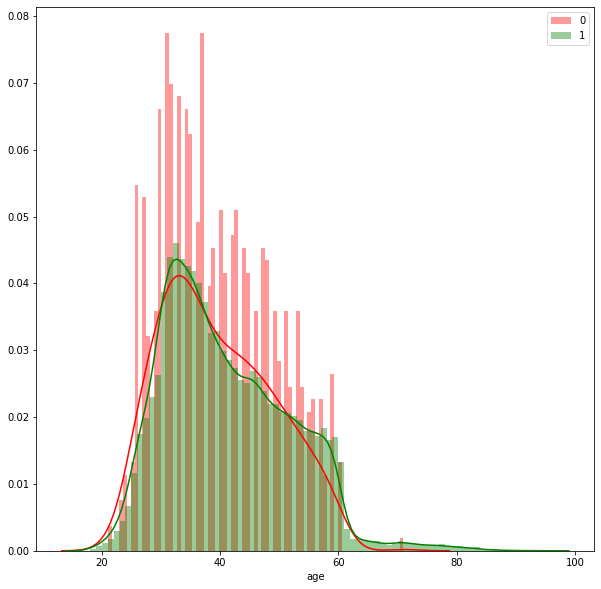

In [17]:
plt.figure(figsize=(10,10))
sns.distplot(dfBankData[dfBankData["default"]=="yes"]["age"], bins=77, color='r',label=0)
sns.distplot(dfBankData[dfBankData["default"]=="no"]["age"],  bins=77, color='g',label=1)
plt.legend()
plt.show()

<h3 style="color:red;">The distribution plot above indicate that there is rather uniform in age for the customers who are found in default and those who are not. This indicates that the age does not play a signicant role in the default condition.</h3>

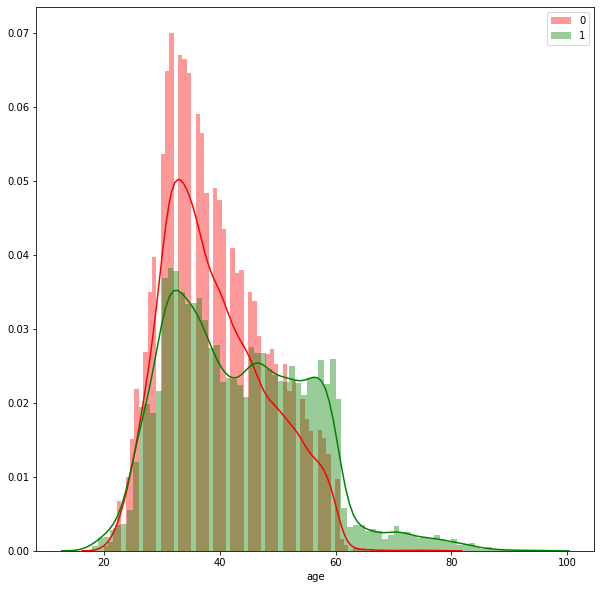

In [18]:
plt.figure(figsize=(10,10))
sns.distplot(dfBankData[dfBankData["housing"]=="yes"]["age"], bins=77, color='r',label=0)
sns.distplot(dfBankData[dfBankData["housing"]=="no"]["age"],  bins=77, color='g',label=1)
plt.legend()
plt.show()

<h3 style="color:red;">The distribution plots above indicate an oportunity to offer a housing loan for those between 30 and 50 years of age. The plot also indicates a tri-modal behaviour for those requesting a mortgage, with peaks around 30, 47 and 60 years. In my opinion the mode around 60 might clearly indicate that elderly people do have money to engage in such a situation of mortgage loan, it might also indicate that something has been well done to allocate these loans</h3>

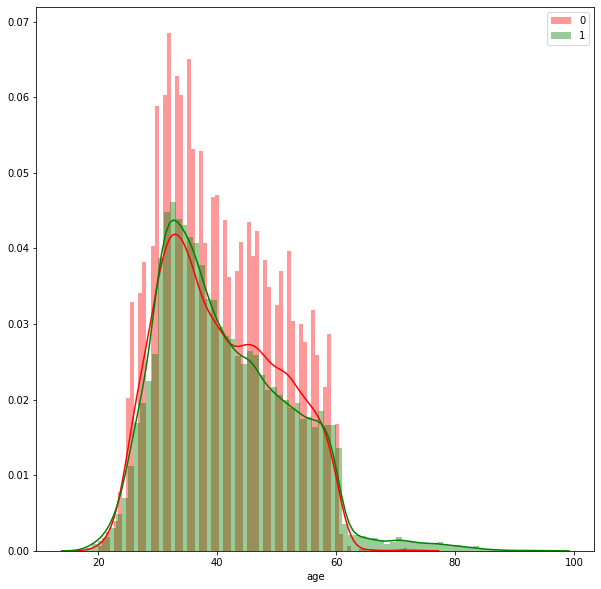

In [19]:
plt.figure(figsize=(10,10))
sns.distplot(dfBankData[dfBankData["loan"]=="yes"]["age"], bins=77, color='r',label=0)
sns.distplot(dfBankData[dfBankData["loan"]=="no"]["age"],  bins=77, color='g',label=1)
plt.legend()
plt.show()

<h3 style="color:red;">As it happened with the distribution plot, no significant distinction in the age and loan allocation has been found, this indicates that the loan allocation is rather homogeneous.</h3>

## Deliverable – 1 (Exploratory data quality report reflecting the following) – (20)
### 2. Multivariate analysis (8 marks)

a. Bi-variate analysis between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes.

b. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots

In [20]:
dfBankData.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [21]:
dfBankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


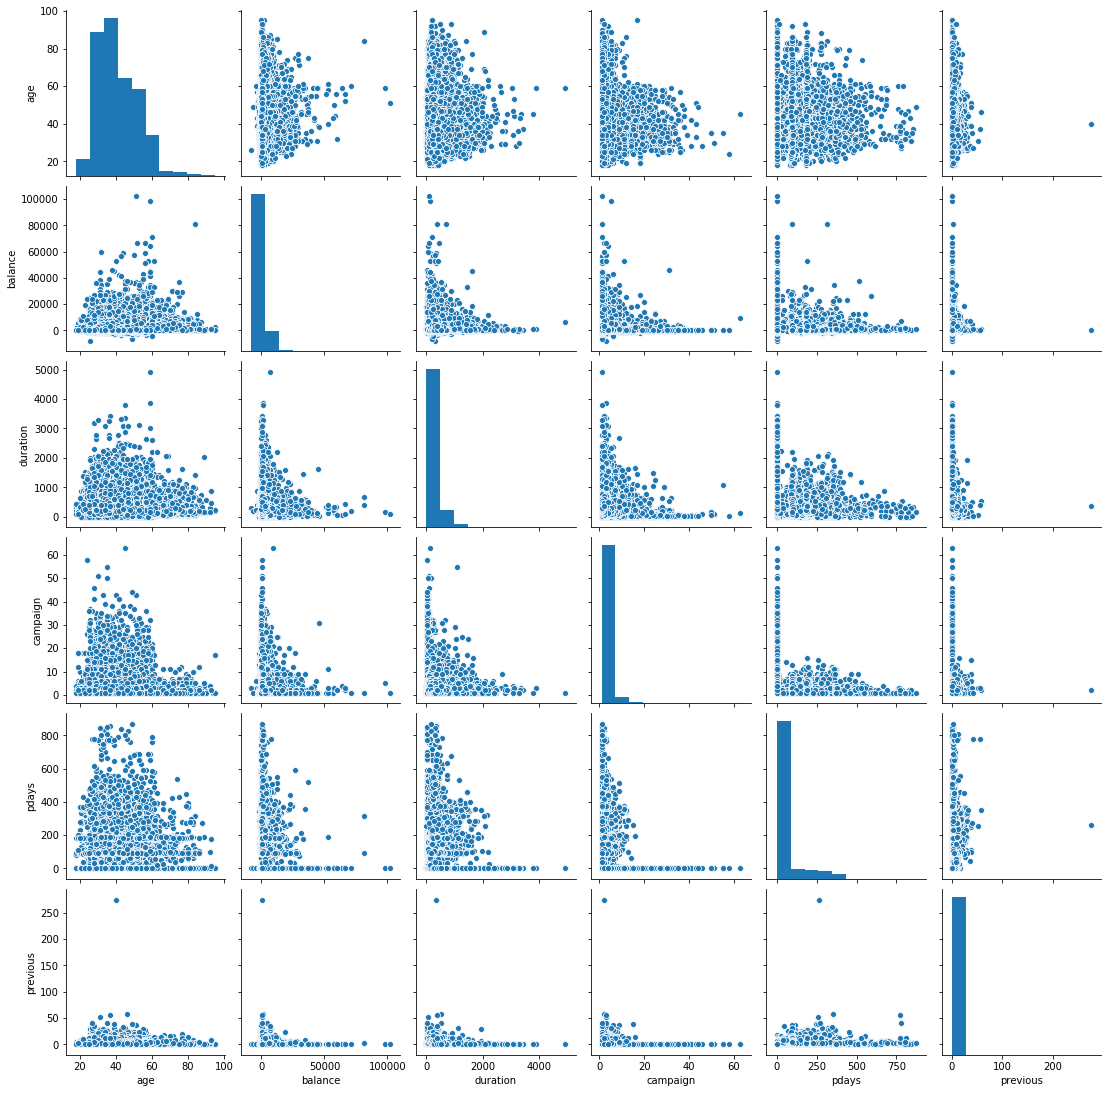

In [22]:
sns.pairplot(dfBankData[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous',]]);

<h3 style="color:red;">The pair-plot above indicates the impact of the "campaing" data to the customers it can be seen that as concluded previously those with a higher age do have more money in their account balances, it can also be seen that younger people were targeted by the campaign more frequently, and longer.</h3>

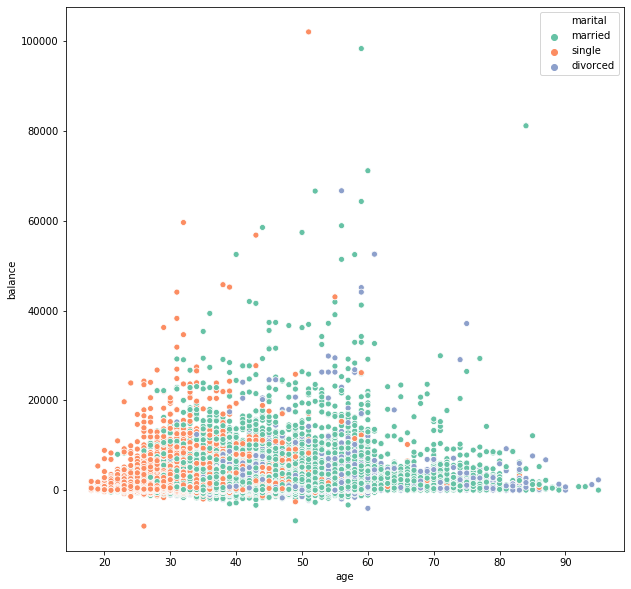

In [23]:
plt.figure(figsize=(10,10))
sns.scatterplot(dfBankData["age"], dfBankData["balance"], hue=dfBankData["marital"], palette='Set2');

<h3 style="color:red;">The scatter plot above shows that elderly peoply might have higher savings (bank account balance), nevertheless, their number reduces in frequency, this explains the outliers in the balance boxplot. A hue has been added here to correlate this to the marital status, being those who are married the ones who constitute the levels of higher balance levels as an overall, confirming what has been previously said.</h3>

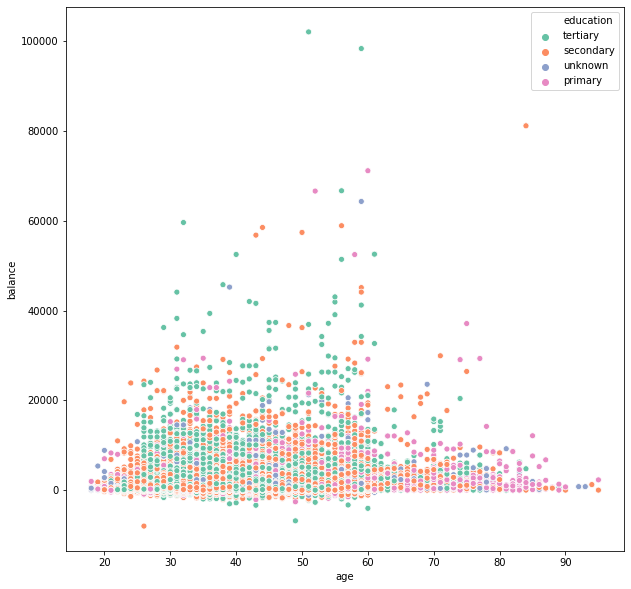

In [24]:
plt.figure(figsize=(10,10))
sns.scatterplot(dfBankData["age"], dfBankData["balance"], hue=dfBankData["education"], palette='Set2');

<h3 style="color:red;">Similar to the graph above, but adding a hue in respect of education level.</h3>

## Deliverable – 2 (Prepare the data for analytics) – (2.5/10)
### 1. Ensure the attribute types are correct. If not, take appropriate actions.

In [25]:
dfBankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [26]:
# for col in dfBankData:
#     print(col," = ",dfBankData[col].unique())

### 2. Get the data model ready.

### 3. Transform the data i.e. scale / normalize if required.

In [27]:
dfBankDataDm1 = pd.get_dummies(dfBankData, columns=["job", "marital", "education", "default", "housing",
                                                    "loan", "contact","month", "poutcome", "Target"])
#dfBankDataDm1.head()

In [28]:
dfBankDataDm1.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'Target_no', 'Target_yes'],
      dtype='object')

In [29]:
dfBankDataDm2=dfBankDataDm1.drop("Target_no" , axis=1)

In [30]:
dfBankDataDm2.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'Target_yes'],
      dtype='object')

In [31]:
X = dfBankDataDm2.drop("Target_yes" , axis=1)
y = dfBankDataDm2.pop("Target_yes")

In [32]:
dfBankDataDm2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   job_admin.           45211 non-null  uint8
 8   job_blue-collar      45211 non-null  uint8
 9   job_entrepreneur     45211 non-null  uint8
 10  job_housemaid        45211 non-null  uint8
 11  job_management       45211 non-null  uint8
 12  job_retired          45211 non-null  uint8
 13  job_self-employed    45211 non-null  uint8
 14  job_services         45211 non-null  uint8
 15  job_student          45211 non-null  uint8
 16  job_technician       4

In [33]:
for col in dfBankDataDm2:
    print(col," = ",dfBankDataDm2[col].unique())

age  =  [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
balance  =  [ 2143    29     2 ...  8205 14204 16353]
day  =  [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
duration  =  [ 261  151   76 ... 1298 1246 1556]
campaign  =  [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]
pdays  =  [ -1 151 166  91  86 143 147  89 140 176 101 174 170 167 195 165 129 188
 196 172 118 119 104 171 117 164 132 131 123 159 186 111 115 116 173 178
 110 152  96 103 150 175 193 181 185 154 145 138 126 180 109 158 168  97
 182 127 130 194 125 105 102  26 179  28 183 155 112 120 137 124 187 190
 113 162 134 169 189   8 144 191 184 177   5  99 133  93  92  10 100 156
 198 106 153 1

In [34]:
for col in dfBankDataDm2:
    print(col," = ",dfBankDataDm2[col].nunique())

age  =  77
balance  =  7168
day  =  31
duration  =  1573
campaign  =  48
pdays  =  559
previous  =  41
job_admin.  =  2
job_blue-collar  =  2
job_entrepreneur  =  2
job_housemaid  =  2
job_management  =  2
job_retired  =  2
job_self-employed  =  2
job_services  =  2
job_student  =  2
job_technician  =  2
job_unemployed  =  2
job_unknown  =  2
marital_divorced  =  2
marital_married  =  2
marital_single  =  2
education_primary  =  2
education_secondary  =  2
education_tertiary  =  2
education_unknown  =  2
default_no  =  2
default_yes  =  2
housing_no  =  2
housing_yes  =  2
loan_no  =  2
loan_yes  =  2
contact_cellular  =  2
contact_telephone  =  2
contact_unknown  =  2
month_apr  =  2
month_aug  =  2
month_dec  =  2
month_feb  =  2
month_jan  =  2
month_jul  =  2
month_jun  =  2
month_mar  =  2
month_may  =  2
month_nov  =  2
month_oct  =  2
month_sep  =  2
poutcome_failure  =  2
poutcome_other  =  2
poutcome_success  =  2
poutcome_unknown  =  2


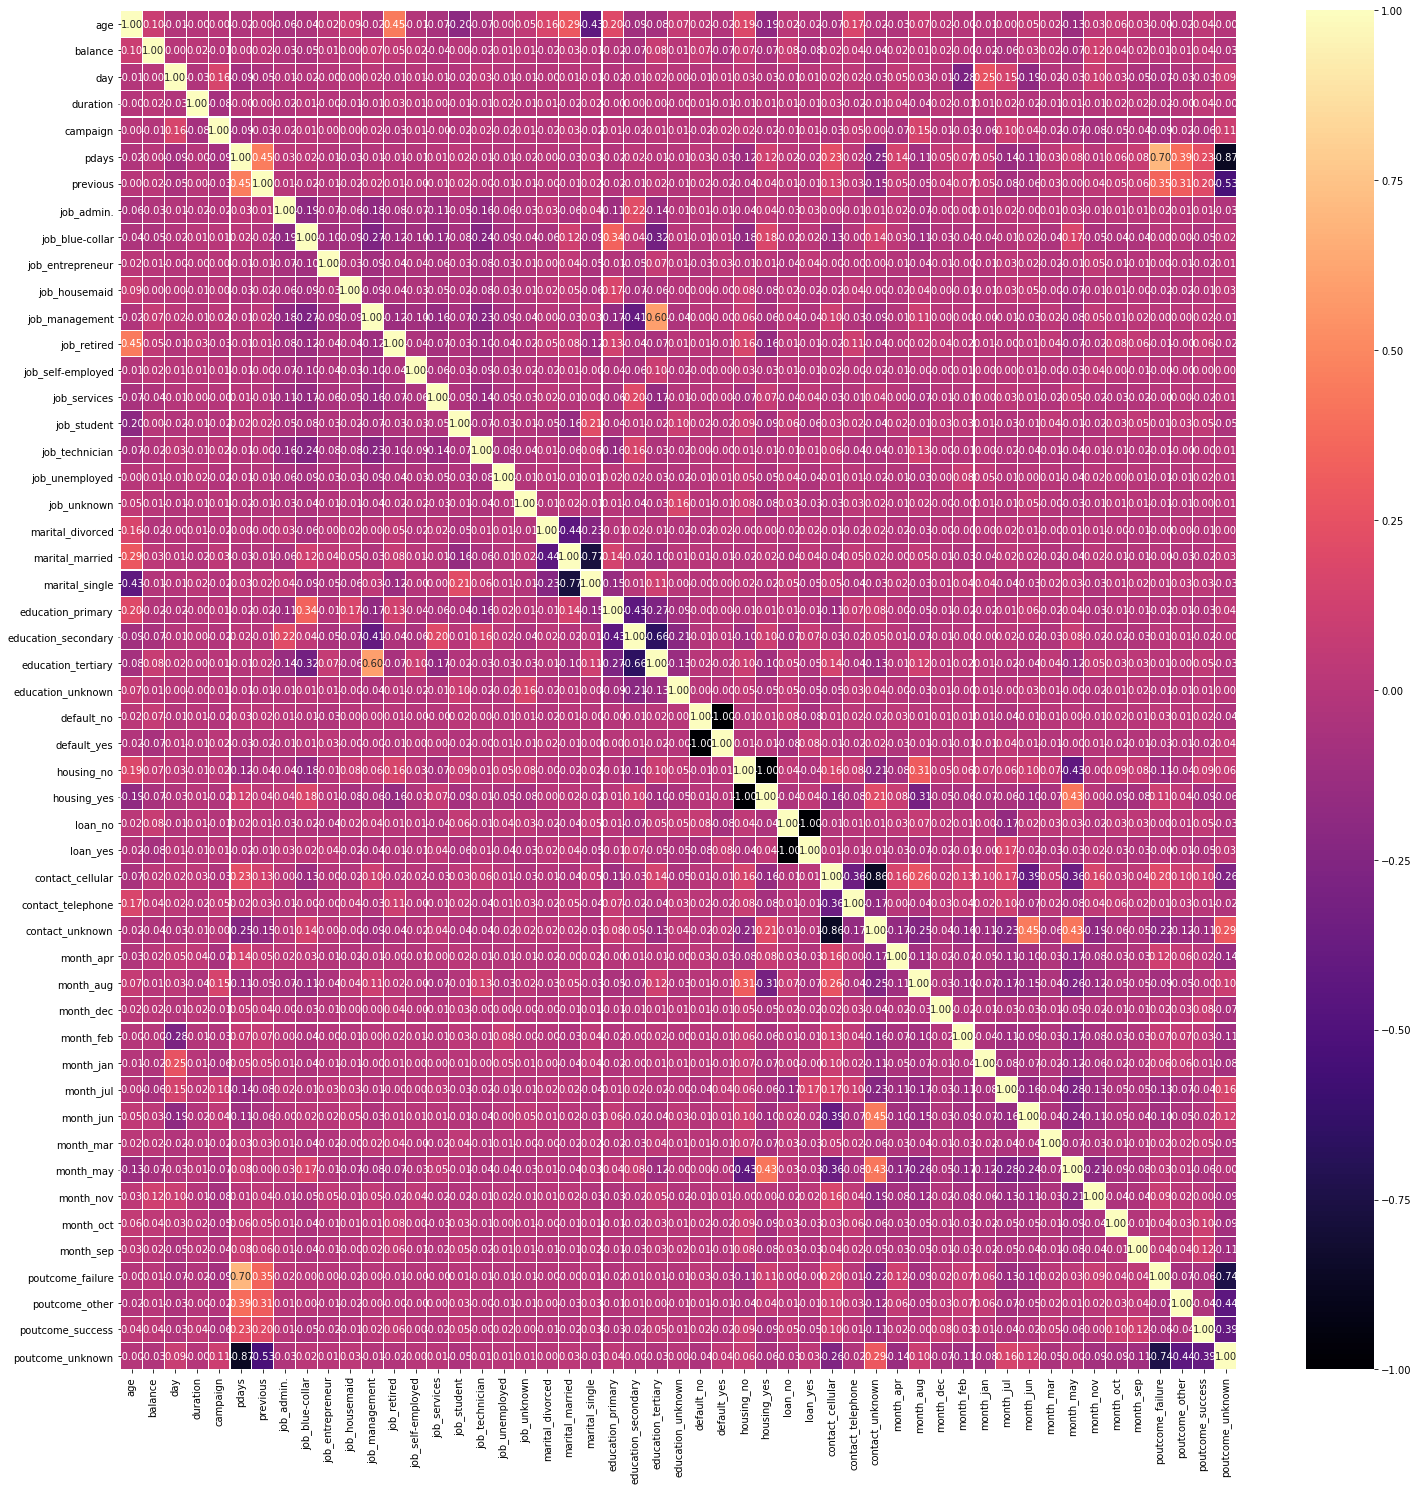

In [35]:
fig,ax = plt.subplots(figsize=(25, 25))   
sns.heatmap(dfBankDataDm2.corr(), ax=ax, annot=True, linewidths=0.05,
            fmt= '.2f',cmap="magma") # the color intensity is based on 
plt.show()

<h3 style="color:red;">Exploring strong and week correlations between variables, notice the data regarding customers in retirement vs age, and those with management positions vs education . Notice as well the month of May vs. housing loan, in respect of the promotional campaign, the same with the failure status of the campaign vs. days left to pass.</h3>

### 4. Create the training set and test set in ratio of 70:30.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

## Deliverable – 3 (create the ensemble model) – (30)
### 1. First create models using Logistic Regression and Decision Tree algorithm. Note the model performance by using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the model. (10 marks)

In [37]:
# Review how was data split
print("{0:0.2f}% data is in training set".format((len(X_train)/len(dfBankDataDm2.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(dfBankDataDm2.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [38]:
#Now lets review how is that the creditability True/False ratio in split data
print("Target_yes True Values    : {0} ({1:0.2f}%)".format(len(dfBankDataDm1.loc[dfBankDataDm1["Target_yes"] == 1]), (len(dfBankDataDm1.loc[dfBankDataDm1["Target_yes"] == 1])/len(dfBankDataDm1.index)) * 100))
print("Target_yes False Values   : {0} ({1:0.2f}%)".format(len(dfBankDataDm1.loc[dfBankDataDm1["Target_yes"] == 0]), (len(dfBankDataDm1.loc[dfBankDataDm1["Target_yes"] == 0])/len(dfBankDataDm1.index)) * 100))
print("")
print("Training Target_yes True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Target_yes False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Target_yes True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Target_yes False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Target_yes True Values    : 5289 (11.70%)
Target_yes False Values   : 39922 (88.30%)

Training Target_yes True Values    : 3738 (11.81%)
Training Target_yes False Values   : 27909 (88.19%)

Test Target_yes True Values        : 1551 (11.43%)
Test Target_yes False Values       : 12013 (88.57%)



<h3 style="color:red;">Logistic Regression.</h3>

In [39]:
# from sklearn import metrics
# from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
#predict on test
y_predict = model.predict(X_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.005132  0.000017  0.001158  0.004214 -0.085233 -0.000549  0.014604   

          7         8         9  ...        42        43        44        45  \
0  0.074403 -0.258164 -0.330034  ...  0.947631 -0.403239 -0.831983  0.821021   

        46        47       48        49        50  intercept  
0  0.66091 -0.710472 -0.53328  1.525815 -0.960217  -0.678153  

[1 rows x 52 columns]


In [40]:
model_score = model.score(X_test, y_test)
print(model_score)

0.9006192863462106


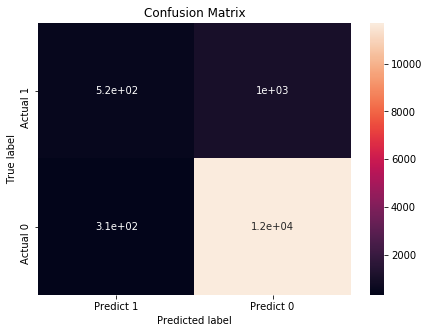

In [41]:
dfConfMatrix = metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

#dfConfMatrix = pd.DataFrame(confMatrix,
#                           index = [i for i in ["Actual 1","Actual 0"]],     # Another alternative way to plot y labels
#                           columns = [i for i in ["Predict 1","Predict 0"]]  # Another alternative way to plot x labels
#                           )
plt.figure(figsize = (7,5))  # This determines the size of the figure, goes always before sns.---
#sns.heatmap(dfConfMatrix, annot=True);   # For the alternative way to print labels.
sns.heatmap(dfConfMatrix, annot=True, xticklabels = ["Predict 1", "Predict 0"] , yticklabels = ["Actual 1", "Actual 0"]);

plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

<h3 style="color:red;">Decision Tree.</h3>

In [42]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [43]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

1.0
0.8765113535830139


In [44]:
train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_File.close()

In [45]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.9005276961481341
0.9019463285166618


0.9019463285166618


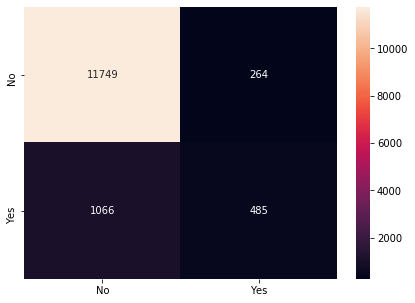

In [46]:
print(dTreeR.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### 2. Build the ensemble models (Bagging and Boosting) and note the model performance by using different matrices. Use same metrics as in above model. (at least 3 algorithms) (15 marks)

<h3 style="color:red;">Bagging.</h3>

In [47]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

0.9076231200235919


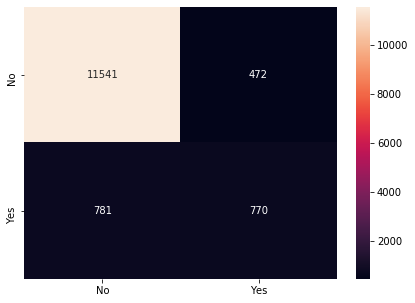

In [48]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

<h3 style="color:red;">Boosting.</h3>

In [49]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)

0.8948687702742554


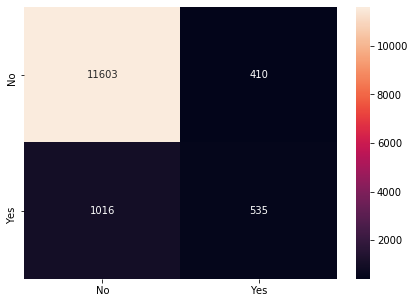

In [50]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### 3. Make a DataFrame to compare models and their metrics. Give conclusion regarding the best algorithm and your reason behind it. (5 marks)

In [51]:
dfComparison = pd.DataFrame({"Logistic Regression": [0.9006192863462106], "Decision Tree": [0.9019463285166618],
                   "Baggin": [0.9076231200235919], "Boosting": [0.8948687702742554]})

In [52]:
dfComparison

,Logistic Regression,Decision Tree,Baggin,Boosting
0,0.900619,0.901946,0.907623,0.894869


<h3 style="color:red;">Even though all models are very close from one another to their predictions, Bagging is the one who got the highest score, and Boosting the worst, but close to the logistic regression model. I think bagging got the highes score due as it might be better avoiding overfitting due to the replacement concept inherent to to this model.</h3>